In [1]:
import numpy as np
import matplotlib.pyplot as plt
from architecture.Model import Model
from dataloader.Dataloader import *
from train.Trainer import *
import torch
from munch import Munch
from architecture.FAN.models import FAN

In [2]:
#argparser doesnt work for jupyter notebook
params = Munch({
    'img_size': 256, #256
    'latent_dim': 16,
    'hidden_dim': 512,
    'batch_size': 8,
    'style_dim': 64,
    'eval_iter': 50,
    'save_epoch': 1,
    'lambda_ds_init': 1.0, #init lambda_ds
    'lambda_ds': 1.0, #current lambda_ds
    'resume_epoch': 0,
    'max_iter': 250,
    'mode': 'train',
    'lr': 1e-4, #1e-4 original
    'f_lr': 1e-6,#1e-6 original
    'beta1': 0.0, #0.0 orig 
    'beta2': 0.99,
    'weight_decay': 1e-4, #crucial element penalizing "big" weights -> if too big model can't become complex enough : https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab
    'checkpoint_dir': '',
    'log_iter': 5,
    'epochs' : 10,
    'fan_pretrained_fname' : "architecture/FAN/weights.pth",
    "wFilter" : 0 # 0<= -> no FAN
})

In [3]:
root = "../shared/stargan_folder/data/afhq/train" #if gpu server
# root = "../shared/dataset/data/celeba_hq/train"
#Model,CopyModel = Model(params)

#restart gpu memory
#torch.cuda.empty_cache()
train_loader = get_loader(root, params.batch_size, params.img_size)
loaders = Munch(train=train_loader)
params.num_domains=len(train_loader.dataset.domains)

trainer = Trainer(params)



Initializing generator...
Initializing mapping_network...
Initializing style_encoder...
Initializing discriminator...


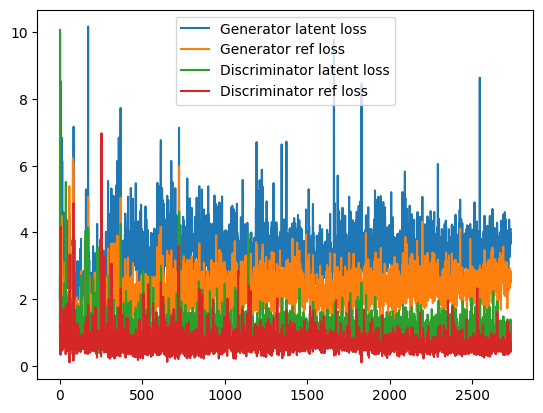

Time elapsed : 2:40:08.042932
Epoch : 2/10, Batch 905/1829


In [ ]:
trainer.train(loaders)

In [6]:
from torchvision.utils import make_grid, save_image

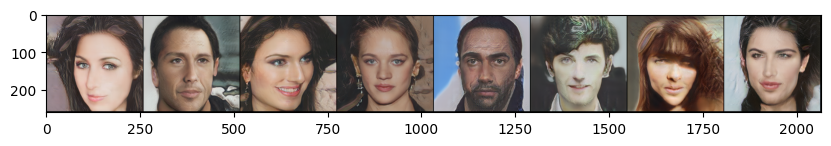

In [11]:
generator = trainer.networks_copy.generator
mn = trainer.networks_copy.mapping_network

train_fetcher=Fetcher(train_loader)
inputs = next(train_fetcher)
x_org,y_org = inputs.x, inputs.y
z1, z2 = inputs.z1, inputs.z2
x_ref1, x_ref2 = inputs.x_ref1, inputs.x_ref2
y_trg = inputs.y_trg

style = mn(z1,y_trg)
input_img=x_org
masks = trainer.networks.fan.get_heatmap(input_img) if params.wFilter>0 else None
x_fake=generator(input_img,style,masks)

x_n = [(x-x.min())/(x.max()-x.min()) for x in x_fake]
#normalize_tensor(x_fake)

grid = make_grid(x_n)



imgs=torch.permute(grid, [1,2,0]).cpu().detach().numpy()
#save_image(grid,"test.png")


#fake_img=torch.permute((x_fake+1)/2, [1,2,0]).cpu().detach().numpy()

plt.figure(figsize=(10,5))
plt.imshow(imgs)
plt.show()


In [28]:
from evaluation.Evaluator import Evaluator

In [25]:
#argparser doesnt work for jupyter notebook
eval_params = Munch({
    'img_size': 256, #256
    'latent_dim': 16,
    'batch_size': 32,
    'num_outputs' : 10,
    "wFilter" : 1, # 0<= -> no FAN
    "val_dir" : "../shared/stargan_folder/data/celeba_hq/val"
})

In [29]:
evaluator = Evaluator(eval_params, trainer.networks_copy, eval_params.val_dir, mode="latent")

In [30]:
evaluator.evaluate_lpips()

NameError: name 'get_loader' is not defined